# trainONE model9_GALAXY

WITH SENTENCE: 푸른 하늘 은하수

galaxyONE = {0:'blue', 1:'color', 2:'star'}

- galaxyONE.h5(1): 200/200/200 // epoch=50 // acc:98%
- galaxyONE.h5(2): 400/400/400 // epoch=50 // acc:100%
- galaxyONE.h5(3): 600/600/600 // epoch-50 // acc:100%
- galaxyONE.h5(4): 800/600/600 // epoch=50 // acc:99%
- galaxyONE.h5(5): 1000/800/600 // epeoch=50 // acc:100%
- galaxyONE.h5(6): 1200/1000/600 // epoch=50 // acc:100%
- galaxyONE.h5(7): 1400/1000/600 // epoch=30 // acc:100%

In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from itertools import chain

galaxyONE = {0:'blue', 1:'color', 2:'star'}
actions = []

for v in galaxyONE.values():
    actions.append(v)

print(actions)

['blue', 'color', 'star']


In [61]:
data = np.concatenate([
                       # blue : 1400
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_blue_1636360677.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_blue_1636361550.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_blue_1636362082.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_blue_1636362727.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_blue_1636362760.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_blue_1636363060.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_blue_1636363451.npy'),
                       # color : 1000
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_color_1636360677.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_color_1636361550.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_color_1636362082.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_color_1636363060.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_color_1636363451.npy'),
                       # star : 200
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_star_1636360677.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_star_1636361550.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/galaxyONE/one_SL_star_1636362082.npy')
], axis=0)

data.shape

(2850, 10, 90)

In [62]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
print(len(actions))

(2850, 10, 89)
(2850,)
3


In [63]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))

y_data.shape

(2850, 3)

In [64]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2565, 10, 89) (2565, 3)
(285, 10, 89) (285, 3)


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 64)                39424     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 99        
Total params: 41,603
Trainable params: 41,603
Non-trainable params: 0
_________________________________________________________________


In [71]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/30
81/81 [==============================] - 2s 12ms/step - loss: 1.2814 - acc: 0.6928 - val_loss: 0.4530 - val_acc: 0.8351

Epoch 00001: val_acc improved from -inf to 0.83509, saving model to models/model.h5
Epoch 2/30
81/81 [==============================] - 1s 9ms/step - loss: 0.3675 - acc: 0.8476 - val_loss: 0.2683 - val_acc: 0.8667

Epoch 00002: val_acc improved from 0.83509 to 0.86667, saving model to models/model.h5
Epoch 3/30
81/81 [==============================] - 1s 9ms/step - loss: 0.2505 - acc: 0.8912 - val_loss: 0.4053 - val_acc: 0.8386

Epoch 00003: val_acc did not improve from 0.86667
Epoch 4/30
81/81 [==============================] - 1s 9ms/step - loss: 0.2175 - acc: 0.9080 - val_loss: 0.2158 - val_acc: 0.9088

Epoch 00004: val_acc improved from 0.86667 to 0.90877, saving model to models/model.h5
Epoch 5/30
81/81 [==============================] - 1s 9ms/step - loss: 0.1756 - acc: 0.9341 - val_loss: 0.3113 - val_acc: 0.8526

Epoch 00005: val_acc did not improve

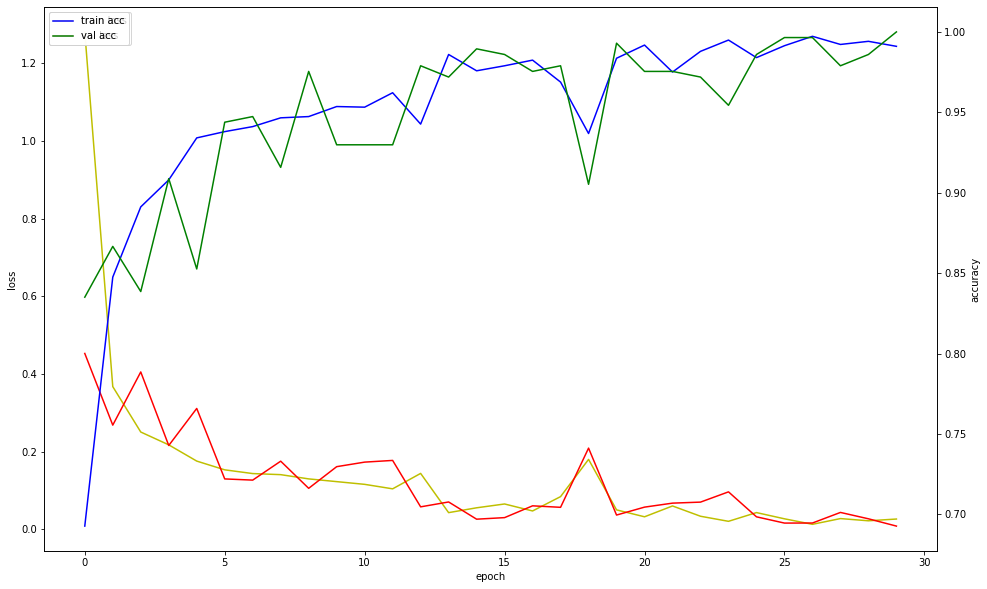

In [72]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [73]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[144,   0],
        [  0, 141]],

       [[193,   0],
        [  0,  92]],

       [[233,   0],
        [  0,  52]]])

In [74]:
from keras.models import load_model

model.save('galaxyONE.h5')

from google.colab import files
files.download('galaxyONE.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>